# Лекция 1

## Создание и визуализация просты графов

## 1. 

1\.1\. Создать функцию генерирующую кольцевой граф из n узлов (n - параметр функции)

1\.2\. Визуализировать граф, построенный с помощью фукнции из задания 1. 

Документация:
* https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs
* https://networkx.github.io/documentation/stable/reference/drawing.html


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

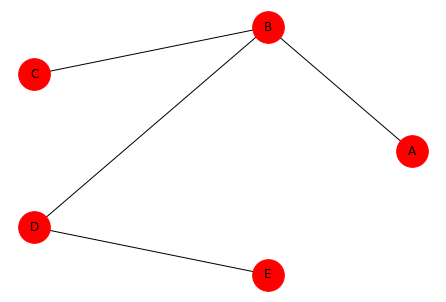

In [5]:
G = nx.Graph()
G.add_node('A')
G.add_node('B')
G.add_node('C')

def add_edge(f_item, s_item, graph=None):
  G.add_edge(f_item, s_item)
  G.add_edge(s_item, f_item)
add_edge('A', 'B', graph=G)
add_edge('B', 'C', graph=G)
add_edge('B', 'D', graph=G)
add_edge('D', 'E', graph=G)

nx.draw_circular(G,
         node_color='red',
         node_size=1000,
         with_labels=True)

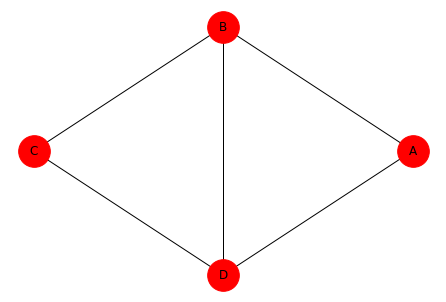

In [9]:
cities = {'A':(0, 20),
     'B':(15, 24),
     'C':(16, 41),
     'D':(10, 40)}

graph = nx.Graph()
graph.add_nodes_from(cities)

kilometres = {('A', 'B', 15),
              ('B', 'C', 16),
              ('B', 'D', 25),
              ('C', 'D', 14),
              ('D', 'A', 18)}

graph.add_weighted_edges_from(kilometres)

nx.draw_circular(graph,
         node_color='red',
         node_size=1000,
         with_labels=True)

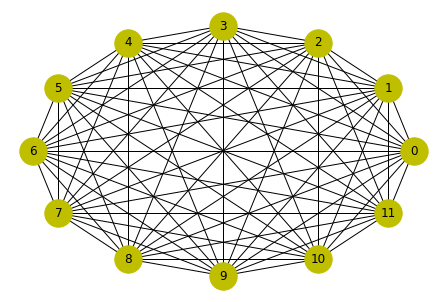

In [25]:
# полный граф
import itertools
def complete_graph(N):
    graph = nx.Graph()
    n = range(N)
    all_pairs = itertools.permutations(n, 2)
    graph.add_nodes_from(n)
    graph.add_edges_from(all_pairs)
    return graph

g = complete_graph(12)

nx.draw_circular(g, 
         node_color='y',
         node_size=750,
         with_labels=True)

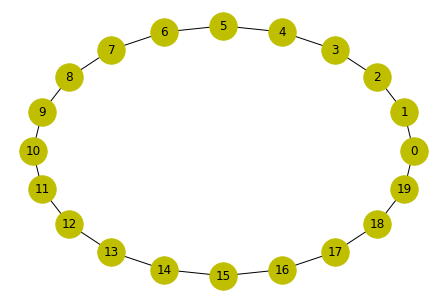

In [30]:
# 1. Создать функцию генерирующую кольцевой граф из n узлов (n - параметр функции)
def circle_graf(N):
    graph = nx.cycle_graph(N)
    nx.draw_circular(graph, 
         node_color='y',
         node_size=750,
         with_labels=True)
circle_graf(20)

## 2. 

2\.1\. Решетки (квадратная, треугольная, гексогональная) + замнутость

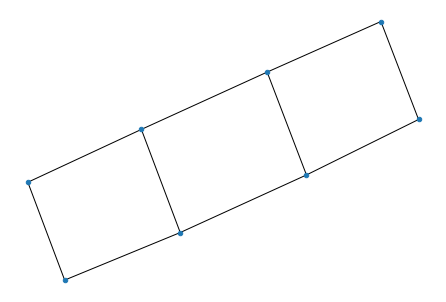

In [49]:
# квадратная
G = nx.grid_2d_graph(4,2)
nx.draw(G,node_size=20)
plt.show()

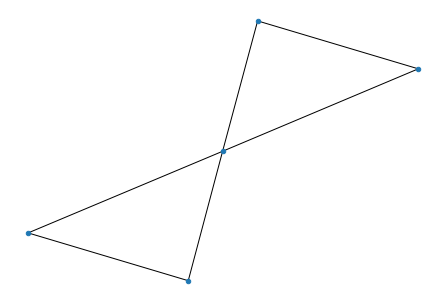

In [58]:
# треугольный
g = nx.triangular_lattice_graph(2, 1, periodic=False, with_positions=True, create_using=None)
nx.draw(g,node_size=20)
plt.show()

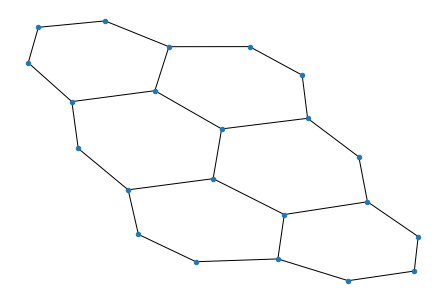

In [48]:
# гексогональный
g = nx.hexagonal_lattice_graph(3, 2, periodic=False, with_positions=True, create_using=None)
nx.draw(g,node_size=20)
plt.show()

## 3. 

3\.
Граф «u,v цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длинной u и v соответственно (см.рис). 

__1,2 цветок:__
![1,2 цветок](1_2_fl.png "1,2 цветок")

__2,2 цветок:__
![2,2 цветок](2_2_fl.png "2,2 цветок")


3\.1\. Релизовать функцию построения 1,2 цветка. Функция принимает один целочисленный параметр n - количество шагов построения. 

Для построенного граафа 1.2 цветка получить:

3\.2\. Количество узлов, количество связей, среднюю степень узла.

3\.3\. Визуализацию графа (с указанием идентификаторов узлов).

3\.4\. Степень каждого узла и сохранить информацию о ней в самом узле.

3\.5\. Визуализацию графа, в котрой размер узла определяется его степенью (с указанием идентификаторов узлов).

Name: 
Type: Graph
Number of nodes: 15
Number of edges: 27
Average degree:   3.6000
0.2571428571428571


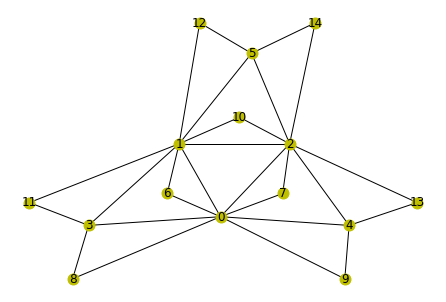

In [231]:
import copy as c
A = nx.Graph()
A.add_node(0)
A.add_node(1)
A.add_edge(0, 1, graph=A)


def flo_12 (n):
    for k in range (n):
        nodes = c.copy(A.nodes)
        for i in [e for e in A.edges]:
            (a,b) = i
            l = c.copy(len(nodes))
            A.add_node(l)
            A.add_edge(a, l, graph=A)
            A.add_edge(b, l, graph=A)

flo_12(3)
    

nx.draw_spectral(A, 
         node_color='y',
         node_size=120,
         with_labels=True)
# 

print(nx.info(A))
print(nx.density(A))

Name: 
Type: Graph
Number of nodes: 12
Number of edges: 16
Average degree:   2.6667


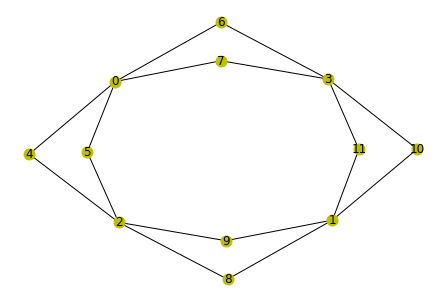

In [257]:
A = nx.Graph()
A.add_node(0)
A.add_node(1)
A.add_edge(0, 1, graph=A)


def flo_22 (n):
    for k in range (n):
        nodes = A.nodes
        for i in [e for e in A.edges]:
            (a,b) = i
            l = len(nodes)
            A.add_node(l)
            A.add_edge(a, l, graph=A)
            A.add_edge(b, l, graph=A)
            A.add_node(l+1)
            A.add_edge(a, l+1, graph=A)
            A.add_edge(b, l+1, graph=A)
            A.remove_edge(a,b)
    return A

flo_22(2)
    

nx.draw(A, 
         node_color='y',
         node_size=120,
         with_labels=True)


print(nx.info(A))

In [258]:
[n for n in A.neighbors(0)]

[4, 5, 6, 7]

In [59]:
import os
 
def get_tree(tree=[u"E:\\Музыка",], G=nx.Graph(), itr= 0, max_itr=900):
    point = tree.pop( 0)
    itr = itr + 1
    sub_tree = [os.path.join(point, x) for x in os.listdir(point) if os.path.isdir(os.path.join(point, x)) and not is_hidden_dir(os.path.join(point, x))]
    if sub_tree:
        tree.extend(sub_tree)
        G.add_edges_from(map(lambda b : (point, b), sub_tree))
    if tree and itr <= max_itr:
        return get_tree(tree, G, itr)
    else:
        return G
 
def is_hidden_dir(d):
    import sys, subprocess
    if sys.platform.startswith("win"):
        p = subprocess.check_output(["attrib", d.encode('cp1251') if isinstance(d, unicode) else d])
        return True if 'H' in p[:12] else False
    else:
        return True if os.path.basename(d)[ 0] == '.' else False
 
def main():
    G = get_tree()
    nx.draw(G, with_labels=False, node_color="blue", alpha= 0.6, node_size=50)
    plt.savefig("edge_colormap.png")
    plt.show()
 
if __name__ == "__main__":
    main()

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'E:\\Музыка'

# 4. 

Датасеты с сетями:

http://networkrepository.com

http://konect.uni-koblenz.de

https://snap.stanford.edu/data/

---

https://networkdata.ics.uci.edu/resources.php

https://kateto.net/2016/05/network-datasets/


Документация:
* https://networkx.github.io/documentation/stable/reference/readwrite/index.html



# 4.

Для построенного граафа 1.2 цветка получить:

4\.1 Значение коэфициента кластеризации каждого узла и сохранить информацию о ней в самом узле.

4\.2 Визуализацию графа, в котрой размер узла определяется его коэффициентом кластреизации.

4\.5 Визуализацию графа, в котрой цвет узла определяется его коэффициентом кластреизации.

4\.6 Визуализацию графа, в котрой коэффициентом кластреизации демонстрируется в подписи к узлу.

4\.7 Среднее значение коэффицента кластеризации для всего графа. (? разные)

# 5.

Для построенного граафа 1.2 цветка получить:

4\.1 Распределение степеней узлов в виде списка картежей вида: (степень, количество\_узлов\_с\_данной\_степенью), картежи в списке отсортированы по возрастанию степени.

4\.2 График распределения степеней узлов.4

4\.3 График распределения степеней узлов, в котором по вертикальной оси откладыватся выборочная частота. Отобразить график в трех масштабах осей: (x, y), (x, ln y), (ln x, ln y).

## 6.

Для построенного граафа 1.2 цветка получить:

5\.1\. Два произвольных узла и кратчайший путь между ними.

5\.2\. Визуализировать кратчайший путь, полученный в предыдущем пункте, используя связи другого цвета и другой толщины.

5\.3\. Средний кратчайший путь для всего графа.

5\.4\. Диаметр графа.

## 7.

7\. Релизовать функцию построения u,v цветка. Функция принимает на вход 3 параметра: u – длина 1го пути при замене связи; v – длина 2го пути при замене связи; n - количество шагов построения. 

In [ ]:
ф